<a href="https://colab.research.google.com/github/fahmidjobbi/TP-COLLAB/blob/main/ConvertDataLooksLikeCifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np

# Define the path to your dataset folders
folder_path = '/content/drive/MyDrive/dataimage'

# Define the image size
img_size = (64, 64)

# Load the images from each folder and resize them
X = []
y = []
label_map = {'anime': 0, 'announcement': 1, 'books': 2, 'family': 3,'startup': 4}
for folder in os.listdir(folder_path):
    label = label_map[folder]
    for filename in os.listdir(folder_path +'/' + folder ):
        img = cv2.imread(folder_path +'/'+ folder + '/' + filename)
        if img is not None:
            img = cv2.resize(img, img_size)
            X.append(img)
            y.append(label)

# Convert the image and label arrays to NumPy arrays
X = np.array(X)
y = np.array(y)


In [ ]:
num_classes=5
# Normalize the pixel values to the range [0, 1]
X = X.astype('float32') / 255.0

# Convert the labels to one-hot encoded format
y = np.eye(num_classes)[y]

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Perform data augmentation on the training set
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')
datagen.fit(X_train)

# Preprocess the training and test sets
train_generator = datagen.flow(X_train, y_train, batch_size=64)
test_datagen = ImageDataGenerator()
test_datagen.fit(X_test)
test_generator = test_datagen.flow(X_test, y_test, batch_size=64)


In [ ]:
# The data, split between train and test sets:
print('x_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (16041, 64, 64, 3)
y_train shape: (16041, 5)
16041 train samples
4011 test samples


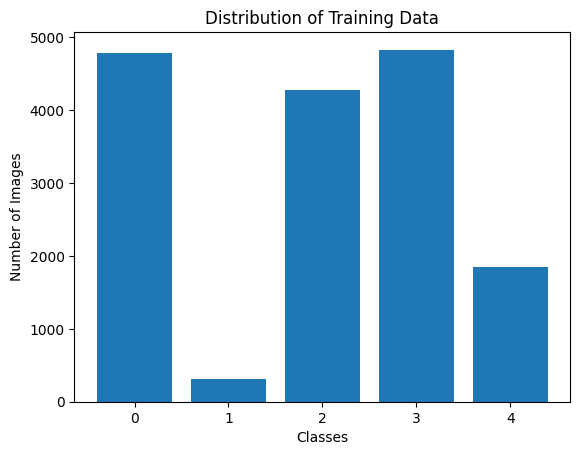

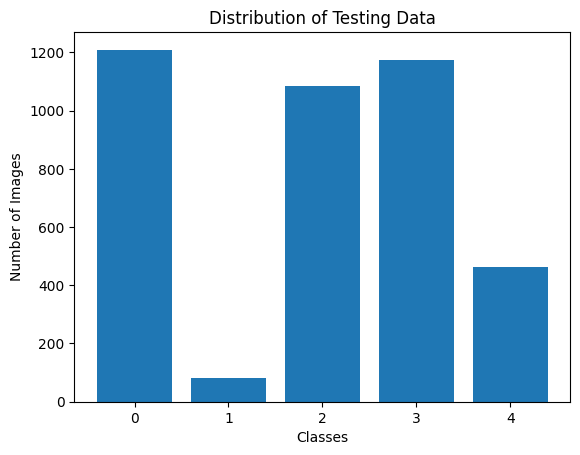

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# assuming you have already loaded and preprocessed your data
# and split it into training and testing sets, with labels one-hot encoded
# and stored in variables x_train, y_train, x_test, y_test

# get the number of images in each class for the training set
train_counts = np.sum(y_train, axis=0)
# get the number of images in each class for the testing set
test_counts = np.sum(y_test, axis=0)

# create a bar plot for the training set
plt.bar(range(len(train_counts)), train_counts)
plt.xticks(range(len(train_counts)))
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Training Data')
plt.show()

# create a bar plot for the testing set
plt.bar(range(len(test_counts)), test_counts)
plt.xticks(range(len(test_counts)))
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Testing Data')
plt.show()




augmented X_train shape: (25665, 64, 64, 3)
augmented y_train shape: (25665, 5)
augmented X_test shape: (6417, 64, 64, 3)
augmented y_test shape: (6417, 5)


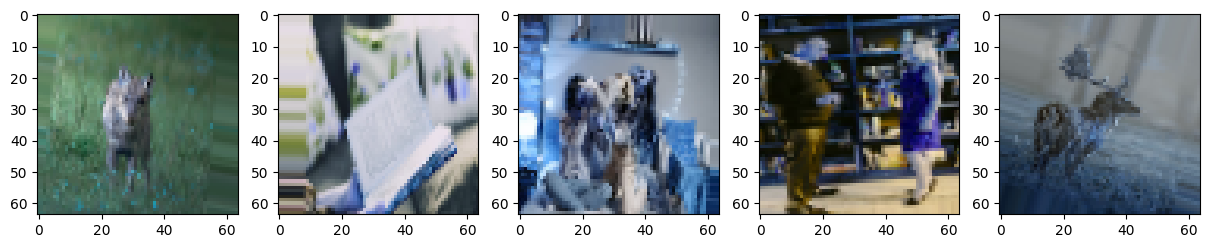

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

# create an ImageDataGenerator object with data augmentation settings
datagen = ImageDataGenerator(
    rotation_range=20,  # rotate images by up to 20 degrees
    width_shift_range=0.1,  # shift images horizontally by up to 10%
    height_shift_range=0.1,  # shift images vertically by up to 10%
    shear_range=0.2,  # apply shearing transformation
    zoom_range=0.2,  # zoom in/out on images by up to 20%
    horizontal_flip=True,  # flip images horizontally
    fill_mode='nearest'  # fill any empty pixels with the nearest value
)

# fit the ImageDataGenerator to your training data
datagen.fit(X_train)

# create a generator that applies the data augmentation to your training data
augmented_data = datagen.flow(X_train, y_train, batch_size=32)

# generate augmented data and concatenate with the original data
augmented_X_train, augmented_y_train = [], []
for i in range(len(X_train)//32 + 1):  # generate augmented data in batches of 32
    x_batch, y_batch = augmented_data.next()
    augmented_X_train.append(x_batch)
    augmented_y_train.append(y_batch)
augmented_X_train = np.concatenate(augmented_X_train)
augmented_y_train = np.concatenate(augmented_y_train)
X_train_all = np.concatenate([X_train, augmented_X_train])
y_train_all = np.concatenate([y_train, augmented_y_train])

# apply the data augmentation to your testing data
augmented_X_test = datagen.flow(X_test, shuffle=False).next()[0]
augmented_y_test = y_test  # no augmentation for testing data

# shuffle and split the data
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_all, y_train_all, test_size=0.2, random_state=42)

# print shapes of augmented data
print('augmented X_train shape:', X_train_final.shape)
print('augmented y_train shape:', y_train_final.shape)
print('augmented X_test shape:', X_val.shape)
print('augmented y_test shape:', y_val.shape)


# plot some augmented images
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axs[i].imshow(augmented_X_train[i])
plt.show()

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline

In [ ]:
########  without data augmentation ####################
# Normalize the data. Before we need to connvert data type to float for computation.
x_train = X_train.astype('float32')
x_test = X_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# convert y_train from shape (none, 5, 5) to (none, 5)
y_train = np.argmax(y_train, axis=2)
y_test = np.argmax(y_test, axis=2)


In [ ]:
# Normalize the data. Before we need to connvert data type to float for computation.
x_train = X_train_final.astype('float32')
x_test = X_val.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.to_categorical(y_train_final, num_classes)
y_test = keras.utils.to_categorical(y_val, num_classes)

# convert y_train from shape (none, 5, 5) to (none, 5)
y_train = np.argmax(y_train, axis=2)
y_test = np.argmax(y_test, axis=2)

In [ ]:
batch_size = 32  # The default batch size of keras.
num_classes =5  # Number of class for the dataset
epochs = 100
data_augmentation = False

In [ ]:
#x_train.shape[1:]
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.applications import VGG16

# Load the VGG16 model, excluding the fully connected layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=x_train.shape[1:])

# Freeze the layers in the VGG16 model so they won't be trained during training
for layer in base_model.layers:
    layer.trainable = False

# Create a new model by adding fully connected layers on top of the pre-trained VGG16 model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()





Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 15,240,517
Trainable params: 525,829
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 activation (Activation)     (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                        

In [ ]:

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
y_train.shape

(16041, 5)

In [ ]:
history = None  # For recording the history of trainning process.
if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=100,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(datagen.flow(x_train, y_train,
                                    batch_size=batch_size),
                                    epochs=epochs,
                                    validation_data=(x_test, y_test),
                                    workers=4)

Not using data augmentation.
Epoch 1/100
502/502 [==============================] - 21s 18ms/step - loss: 1.4147 - accuracy: 0.2909 - val_loss: 1.3977 - val_accuracy: 0.3029
Epoch 2/100
502/502 [==============================] - 8s 16ms/step - loss: 1.4011 - accuracy: 0.3215 - val_loss: 1.3782 - val_accuracy: 0.3603
Epoch 3/100
502/502 [==============================] - 8s 16ms/step - loss: 1.3865 - accuracy: 0.3484 - val_loss: 1.3896 - val_accuracy: 0.3356
Epoch 4/100
502/502 [==============================] - 8s 16ms/step - loss: 1.3780 - accuracy: 0.3605 - val_loss: 1.3679 - val_accuracy: 0.3672
Epoch 5/100
502/502 [==============================] - 8s 16ms/step - loss: 1.3716 - accuracy: 0.3699 - val_loss: 1.3624 - val_accuracy: 0.3650
Epoch 6/100
502/502 [==============================] - 8s 16ms/step - loss: 1.3662 - accuracy: 0.3714 - val_loss: 1.3671 - val_accuracy: 0.3772
Epoch 7/100
502/502 [==============================] - 8s 16ms/step - loss: 1.3568 - accuracy: 0.3802 - va

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


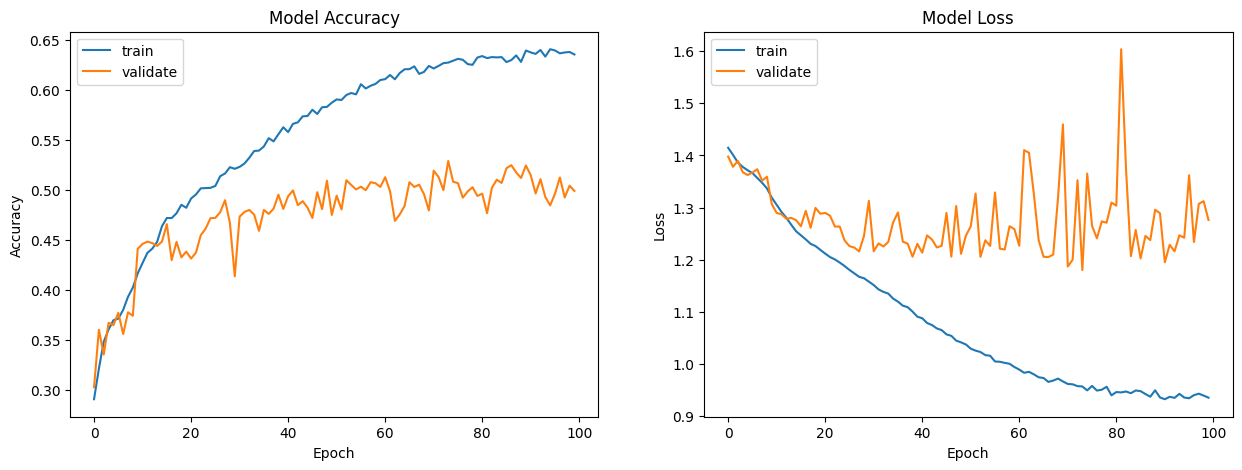

In [ ]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

In [ ]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)



126/126 [==============================] - 1s 8ms/step - loss: 1.2763 - accuracy: 0.4989
Test loss: 1.2762887477874756
Test accuracy: 0.4988780915737152
126/126 [==============================] - 1s 4ms/step


In [ ]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_5topic_trained_model.h5'

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


Saved trained model at /content/saved_models/keras_5topic_trained_model.h5 
126/126 [==============================] - 1s 7ms/step - loss: 1.2763 - accuracy: 0.4989
Test loss: 1.2762887477874756
Test accuracy: 0.4988780915737152


In [ ]:
mylabel = ['anime', 'announcement', 'books', 'family','startup']
#mylabel = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
import numpy as np
import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing import image
from keras.models import load_model

# Load an example image and resize it to (64, 64)
img_path = '/content/1187.png'
img = Image.open(img_path).resize((64, 64))
img = image.img_to_array(img)

# Add extra dimension to the image
img = np.expand_dims(img, axis=0)

# Preprocess the image
img = tf.keras.applications.resnet50.preprocess_input(img)

# Load the model
model = load_model('/content/saved_models/keras_5topic_trained_model.h5')

# Predict the class of the image
predimg = model.predict(img)
classes = np.argmax(predimg, axis=1)
i=mylabel[classes[0]]
print(i)

1/1 [==============================] - 0s 76ms/step
anime
